In [1]:
%matplotlib inline 
#outputs figures one cell below when called
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp 
from sympy import *
from sympy.physics.quantum import TensorProduct
sp.init_printing()


# The Hamiltonian Matrix of a 1+1 system
A system, composed of two subsystems, the Quantum Network (QN) and the Computational Layer (CL), contains 1 reservoir qubits, coupled with eachother, interacting with 1 computational qubits, through quantum tunneling. The general Hamiltonian of the QN of $l$ sites, is given as:
$$
\begin{equation}
\hat{H}_{QN} = \sum_lE_l\hat{a}_l^\dagger\hat{a}_l + \sum_{ll'}K_{ll'}(\hat{a}_l^\dagger\hat{a}_{l'}+ \hat{a}_{l'}^\dagger\hat{a}_l) + \sum_l(P_l^*\hat{a}_l + P_l\hat{a}_l^\dagger)
%|\psi_{qb}\rangle $\eqref{eq:hqn}$
\label{eq:hqn} \tag{1}
\end{equation}
$$


Where $E$ is the onsite energies of the states of the QN qubits. The $K$ terms define the so called hopping terms, which translates the state at one site to the other. Finally, the classical field excitation, $P$, is induced into the QN, which simulates a quantum operation. From $\eqref{eq:hqn}$, we see $H_{QN}$ is hermitian.

For the CL subsystem, the general hermertian Hamiltonian, for the $k^{th}$ qubit acting on $l^{th}$ site, is represented as follows: 
$$
\begin{equation}
\hat{H}_{CL} = \sum_{kl}(J_{kl}^*\hat{\sigma}_k^+\hat{a}_l + J_{kl}\hat{a}_l^\dagger\hat{\sigma}_k^-) 
%|\psi_{qb}\rangle $\eqref{eq:hqn}$
\label{eq:hcn} \tag{2}
\end{equation}
$$

Where the $J$ terms indicate the computational qubits (represented by $k$) entanglement between the QN qubits (represented by $l$). The pauli matrices are given as follows: 

$$
\begin{equation}
\sigma_k^{\pm} = \frac{1}{2}(\sigma_k^x \mp i\sigma_k^y)\newline
\sigma_k^{\pm} = \frac{1}{2}\left(\left(\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right) \mp i\left(\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right)\right)\newline
\end{equation}
$$
where
$$
\begin{equation}
\sigma_k^{-} = \left(\begin{array}{cc}
0 & 1\\
0 & 0
\end{array}\right)\newline
\&\newline
\sigma_k^{+} = \left(\begin{array}{cc}
0 & 0\\
1 & 0
\end{array}\right)
%|\psi_{qb}\rangle $\eqref{eq:hqn}$
\label{eq:pauli} \tag{3}
\end{equation}
$$


where, the basis is taken as:
$$
\begin{equation}
\newline
|g\rangle = \left(\begin{array}{cc}
1\\
0
\end{array}\right)
\&\
|e\rangle = \left(\begin{array}{cc}
0\\
1
\end{array}\right)
\label{eq:adag} \tag{4}
\end{equation}
$$

and the full wavefunction (total hamiltonian follows same property) of an N+N system is:
$$
\begin{equation}
\newline
|\psi\rangle = |Q_{c1}\rangle \otimes |Q_{c2}\rangle \otimes |Q_{c3}\rangle \otimes...|Q_{r1}\rangle \otimes |Q_{r2}\rangle \otimes |Q_{r3}\rangle \otimes ...|Q_{rN}\rangle 
\label{eq:wavefn} \tag{5}
\end{equation}
$$

The total Hamiltonian of our system is then:
$
\begin{equation}
\hat{H} = \sum_lE_l\hat{a}_l^\dagger\hat{a}_l + \sum_{ll'}K_{ll'}(\hat{a}_l^\dagger\hat{a}_{l'}+ \hat{a}_{l'}^\dagger\hat{a}_l) + \sum_l(P_l^*\hat{a}_l + P_l\hat{a}_l^\dagger) + \sum_{kl}(J_{kl}^*\sigma_k^{+}\hat{a}_l + J_{kl}\hat{a}_l^\dagger\sigma_k^{-})
\label{eq:h}
\end{equation}
$

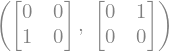

In [4]:
#nomenculture like E01 ground energy of qubit 1 
E11,E01,P1, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
I2 = sp.eye(2)
a_dag = sp.Matrix([[0,0],
                   [1,0]])
sigmap = sp.Matrix([[0,0],[1,0]])
sigmam = sigmap.T
sigmap, sigmam

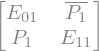

In [3]:
#state of our reservior system 
qr1 = sp.Matrix([[E01,P1.conjugate()],
                 [P1,E11]])
qr1

In [5]:
#hamil of res, if more tensor of all
qrh = qr1

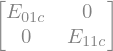

In [6]:
c1 = sp.Matrix([[E_01,0],[0,E_11]])
c1

In [7]:
#hamilt of comp sys
ch = c1

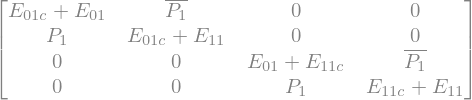

In [8]:
#hamil of total system is thus
Hh = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
Hh

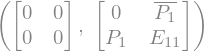

In [9]:
#can edit values here if need be
E01,E_11c, E_01c = (0,0,0)

ch = ch.subs({"E_{11c}":E_11c, "E_{01c}":E_01c})
qrh = qrh.subs({"E_{11}":E11,"E_{01}":E01,"P_{1}":P1})
ch,qrh

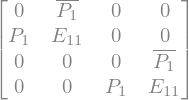

In [10]:
#just rewritting hamil with zero potential+gnd state
H = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
H

In [11]:
#now to introduce coupling 
def MTP(A,B):
    return TensorProduct(A,B)

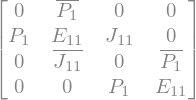

In [12]:
H = H + J11.conjugate()*(MTP(sigmap,a_dag.T)) + J11 * (MTP(sigmam, a_dag))
H

## TIME EVOLUTION OPERATOR

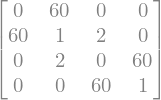

In [19]:
E11,E01,P1, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
Hcopy = H
E11,P1,J11 = (1,60,2)
Hcopy = Hcopy.subs({"E_{11}":E11,"P_{1}":P1, "J_{11}":J11})
Hcopy

$$
\begin{equation}
U = \exp(\frac{-i\hat{H}\tau}{\hbar})
\label{exp} \tag{6}
\end{equation}
$$

In [14]:
#hbar=1
tauhbar = 0.005

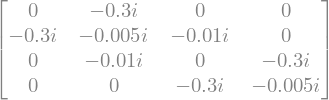

In [20]:
Hcopy = -1j * Hcopy * tauhbar
Hcopy

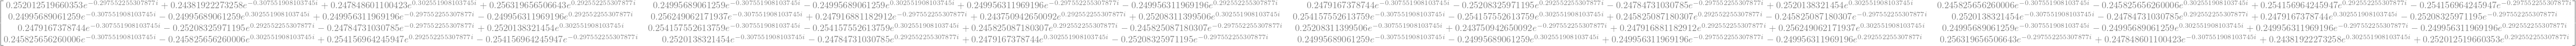

In [22]:
# = sp.exp(Hcopy)
U = Hcopy.exp()
#U.simplify()
U

In [ ]:
#U_dagU = I
#TensorProduct(U.T, U)

In [33]:
np.array([[2,3],[1,2+1j]]).dtype

dtype('complex128')

In [36]:
np.array(U).astype(np.complex_).dtype

dtype('complex128')

In [ ]:
#D = 1/U.norm() * U
#D

In [ ]:
#U_dagU = I
#TensorProduct(D.T, D)

In [37]:
#gnd state 
psi_initial = sp.Matrix([[1],[0]])

In [ ]:
#N = 
psi_initial.norm()

In [ ]:
# v = (1/N, 0/N)
d = 1/psi_initial.norm()* psi_initial.normalized()
d

In [ ]:
psi_initial.is_normalized

In [ ]:
psi1 = U*psi_initial
psi1


In [ ]:
#evolving state
t = 2000/tauhbar #how many steps/iterations of psi, 10 in this case
for j in range(t):
    